<a href="https://colab.research.google.com/github/LatikaAdhikari064/SQL-Injection-Detection/blob/main/SQl_LatikaAdhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('dataset1.csv')


In [ ]:
print(data.head())


    Label Method                                         User-Agent    Pragma  \
0  Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...  no-cache   
1  Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...  no-cache   
2  Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...  no-cache   
3  Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...  no-cache   
4  Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...  no-cache   

  Cache-Control                                             Accept  \
0      no-cache  text/xml,application/xml,application/xhtml+xml...   
1      no-cache  text/xml,application/xml,application/xhtml+xml...   
2      no-cache  text/xml,application/xml,application/xhtml+xml...   
3      no-cache  text/xml,application/xml,application/xhtml+xml...   
4      no-cache  text/xml,application/xml,application/xhtml+xml...   

                    Accept-encoding               Accept-charset language  \
0  x-gzip, x-de

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            61065 non-null  object
 1   Method           61065 non-null  object
 2   User-Agent       61065 non-null  object
 3   Pragma           61065 non-null  object
 4   Cache-Control    61065 non-null  object
 5   Accept           60668 non-null  object
 6   Accept-encoding  61065 non-null  object
 7   Accept-charset   61065 non-null  object
 8   language         61065 non-null  object
 9   host             61065 non-null  object
 10  cookie           61065 non-null  object
 11  content-type     17977 non-null  object
 12  connection       61065 non-null  object
 13  lenght           17977 non-null  object
 14  content          17977 non-null  object
 15  classification   61065 non-null  int64 
 16  URL              61065 non-null  object
dtypes: int64(1), obje

In [ ]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Label                  0
Method                 0
User-Agent             0
Pragma                 0
Cache-Control          0
Accept               397
Accept-encoding        0
Accept-charset         0
language               0
host                   0
cookie                 0
content-type       43088
connection             0
lenght             43088
content            43088
classification         0
URL                    0
dtype: int64


In [ ]:
print(data.columns)


Index(['Label', 'Method', 'User-Agent', 'Pragma', 'Cache-Control', 'Accept',
       'Accept-encoding', 'Accept-charset', 'language', 'host', 'cookie',
       'content-type', 'connection', 'lenght', 'content', 'classification',
       'URL'],
      dtype='object')


In [ ]:
# List the columns you want to drop
columns_to_drop = ['Accept-Encoding', 'User-Agent']

# Keep only the columns that are actually in the DataFrame
columns_in_df = [col for col in columns_to_drop if col in data.columns]

# Drop the existing columns
data = data.drop(columns=columns_in_df)

print(f"Dropped columns: {columns_in_df}")


Dropped columns: ['User-Agent']


<ipython-input-61-6308311ca075>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data,palette=['#1f77b4', '#ff7f0e'])


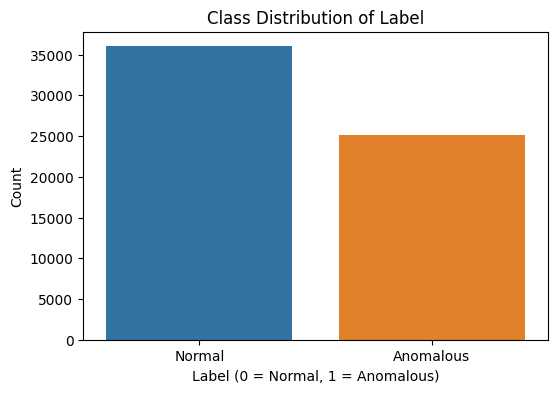

In [ ]:
# Plot the distribution of the Label column
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data,palette=['#1f77b4', '#ff7f0e'])
plt.title('Class Distribution of Label')
plt.xlabel('Label (0 = Normal, 1 = Anomalous)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate class imbalance ratio
normal_count = data['Label'].value_counts().iloc[0]  # Change here
anomalous_count = data['Label'].value_counts().iloc[1]  # Change here
imbalance_ratio = anomalous_count / normal_count
print(f"\nClass Imbalance Ratio (Anomalous/Normal): {imbalance_ratio:.2f}")


Class Imbalance Ratio (Anomalous/Normal): 0.70


In [ ]:
#Display basic statistics for numerical columns if any (not directly needed for text columns)
print("\nBasic Statistics for Numerical Columns:")
print(data.describe())


Basic Statistics for Numerical Columns:
       classification
count    61065.000000
mean         0.410464
std          0.491922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000


In [ ]:
X = data['URL']  # Features: URLs
y = data['Label']  # Target: Labels indicating benign (0) or SQL injection (1)

In [ ]:
# Use TfidfVectorizer to vectorize URLs
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


In [ ]:
# Print the shapes to verify the split
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(42745, 5000), y_train=(42745,)
Testing data shape: X_test=(18320, 5000), y_test=(18320,)


In [ ]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the performance using different metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Anomalous')
recall = recall_score(y_test, y_pred, pos_label='Anomalous')
f1 = f1_score(y_test, y_pred, pos_label='Anomalous')

In [ ]:
# Print the results
print("LogisticRegression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

LogisticRegression Model Performance:
Accuracy: 0.85
Precision: 0.80
Recall: 0.84
F1-score: 0.82


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.78
Precision: 0.80
Recall: 0.84
F1-score: 0.82


In [ ]:
# Train the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.80
Recall: 0.84
F1-score: 0.82


In [ ]:
from sklearn.utils import resample
from sklearn.ensemble import StackingClassifier

log_reg = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Define meta-model stacking
estimators = [
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes),
    ('random_forest', random_forest)
]


In [ ]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)



In [ ]:
stacking_model.fit(X_train, y_train)



StackingClassifier(cv=5,
                   estimators=[('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('naive_bayes', MultinomialNB()),
                               ('random_forest',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred = stacking_model.predict(X_test)



In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='Anomalous')
recall = recall_score(y_test, y_pred, average='binary', pos_label='Anomalous')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='Anomalous')

In [ ]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.80
Recall: 0.84
F1-Score: 0.82


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [12213, 18320]

In [ ]:
print(conf_matrix)

[[6340 1221]
 [1665 9094]]


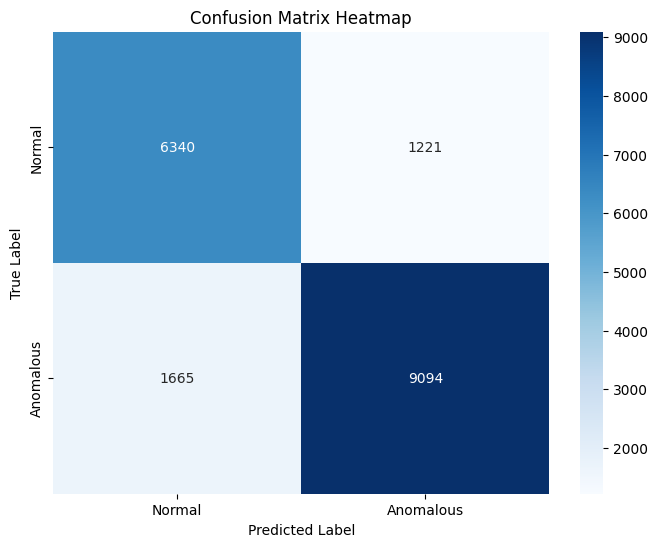

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics for each model
models = ['LogisticRegression', 'MultinomialNB', 'Random Forest']
accuracy = [0.85, 0.78, 0.84]
precision = [0.80, 0.80, 0.80]
recall = [0.84, 0.84, 0.84]
f1_score = [0.82, 0.82, 0.82]
# Set up the bar width and locations
bar_width = 0.2
index = np.arange(len(models))



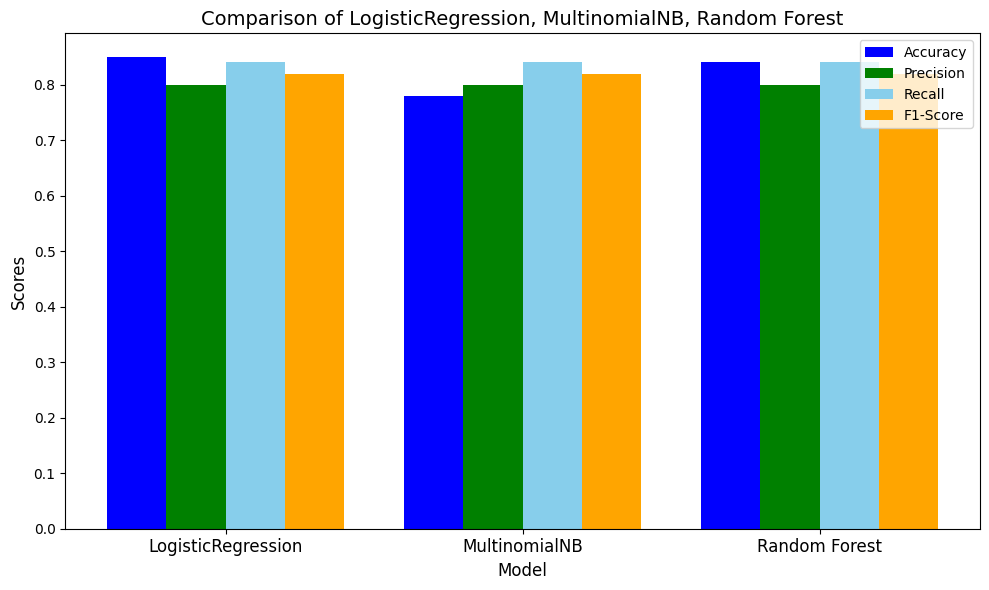

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='skyblue')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', color='orange')

# Add labels, title, and ticks
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of LogisticRegression, MultinomialNB, Random Forest', fontsize=14)
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, fontsize=12)
ax.legend()


# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Vectorize the URL column
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(data['URL'])
y = data['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Define parameter grids for hyperparameter tuning
param_grid_log_reg = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']
}

param_grid_naive_bayes = {
    'alpha': [0.1, 0.5, 1, 2],  # Smoothing parameter
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, scoring='accuracy', cv=5, n_jobs=-1)
grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
# Multinomial Naive Bayes
naive_bayes = MultinomialNB()
grid_naive_bayes = GridSearchCV(naive_bayes, param_grid_naive_bayes, scoring='accuracy', cv=5, n_jobs=-1)
grid_naive_bayes.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 2]}, scoring='accuracy')

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
grid_random_forest = GridSearchCV(random_forest, param_grid_random_forest, scoring='accuracy', cv=5, n_jobs=-1)
grid_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Display best parameters and scores for each model
print("Best Parameters and Accuracy for Models:")
print(f"Logistic Regression: {grid_log_reg.best_params_}, Accuracy: {grid_log_reg.best_score_:.2f}")
print(f"Naive Bayes: {grid_naive_bayes.best_params_}, Accuracy: {grid_naive_bayes.best_score_:.2f}")
print(f"Random Forest: {grid_random_forest.best_params_}, Accuracy: {grid_random_forest.best_score_:.2f}")
